<a href="https://colab.research.google.com/github/ShinAsakawa/2019seminar_info/blob/master/notebooks/2019si_cnn_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNを用いた画像認識の基礎

In [0]:
!ls k*.npz

kmnist-test-imgs.npz    kmnist-train-imgs.npz
kmnist-test-labels.npz  kmnist-train-labels.npz


(28, 28)


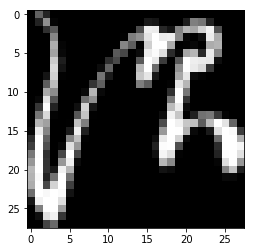

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X = np.load('kmnist-test-imgs.npz')['arr_0'][0]
print(X.shape)
plt.imshow(X,cmap='gray')

(28, 28)


Text(0.5, 1.0, 'The original image')

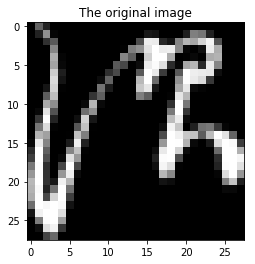

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline 

# ごくシンプルな畳み込み層を定義しています
class Conv:
    # シンプルな例を考えるため、Wは3x3で固定し、後の節で扱うstridesやpaddingは考えません
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                # 要素ごとの積の合計をとっています
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

X = np.load('kmnist-test-imgs.npz')['arr_0'][0]
print(X.shape)
plt.title("The original image", fontsize=12)
plt.imshow(X,cmap='gray')

(28, 28)


Text(0.5, 1.0, 'The original image')

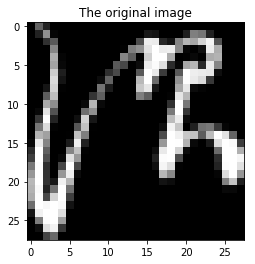

Text(0.5, 0.98, 'kernel')

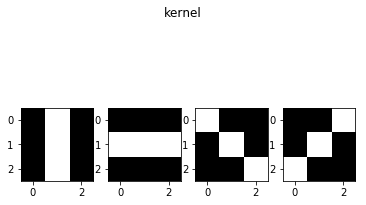

Text(0.5, 0.98, 'Convolution result')

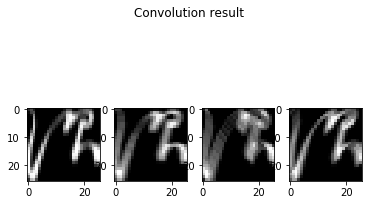

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# ごくシンプルな畳み込み層を定義しています
class Conv:
    # シンプルな例を考えるため、Wは3x3で固定し、後の節で扱うstridesやpaddingは考えません
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                # 要素ごとの積の合計をとっています
                out[i,j] = np.dot(self.W.flatten(), x.flatten())
        return out

X = np.load('kmnist-test-imgs.npz')['arr_0'][0]
print(X.shape)
plt.title("The original image", fontsize=12)
plt.imshow(X,cmap='gray')    
plt.show()

# カーネルを適切に設定してください
W1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
W2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
W3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
W4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

plt.subplot(1,4,1); plt.imshow(W1,cmap='gray')
plt.subplot(1,4,2); plt.imshow(W2,cmap='gray')
plt.subplot(1,4,3); plt.imshow(W3,cmap='gray')
plt.subplot(1,4,4); plt.imshow(W4,cmap='gray')
plt.suptitle("kernel", fontsize=12)
plt.show()

# 畳み込み
conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(C1,cmap='gray')
plt.subplot(1,4,2); plt.imshow(C2,cmap='gray')
plt.subplot(1,4,3); plt.imshow(C3,cmap='gray')
plt.subplot(1,4,4); plt.imshow(C4,cmap='gray')
plt.suptitle("Convolution result", fontsize=12)
plt.show()

### プーリング